# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data) + History + Matchup


In notebooks 7.1 to 7.4, we added variations of player history and matchup data individually to see how they might affect accuracy of our models. Overall, adding these features decreased our accuracy in our best model - Decision Tree

In this notebook, we will add all feature columns for both player history and matchup's into the dataset and see how this affects our model.

Player history data:

* wins - matches won
* losses - matches lost
* games won
* sets won
* games lost
* sets lost
* winning percentage = wins / (wins + losses)
* games won percetnage = games won / (games won + games lost)
* sets won percentage = sets won / (sets won + sets lost)

Matchup data:

* matchups won - ie, out of last 5 matchups - how many matches did p1 win
* matchups lost
* matchups sets won
* matchups sets lost
* matchups games won
* matchups games lost
* matchups win percentage
* matchups sets won percentage
* matchups games won percentage

We will see if this data helps improve our models

### Results from Decision Tree Classifier with player diff + one hot encoded player ID's:

```
Model Score: 0.9372638963842418

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.94      7378
         Win       0.94      0.93      0.94      7446

    accuracy                           0.94     14824
   macro avg       0.94      0.94      0.94     14824
weighted avg       0.94      0.94      0.94     14824
```

# Summary of Results


* Decision Tress is still our best model, although adding this data did not help our predict and overall accuracy decreased by about 0.9%

Player Diff + One Hot Encoding (All Categories) + Player History
```
Model Score: 0.9286292498650837

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7378
         Win       0.93      0.92      0.93      7446

    accuracy                           0.93     14824
   macro avg       0.93      0.93      0.93     14824
weighted avg       0.93      0.93      0.93     14824
```



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe-history-matchup"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe_player-matchup5.csv'

START_YEAR = 1998
END_YEAR = 2019

MODEL_TEMPLATE_NAME = f'{START_YEAR}-{END_YEAR}-{DESCRIPTION}.pkl'

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



ModelWrapper.init(description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR, 
                 model_file_format = MODEL_TEMPLATE_NAME)

# Load Data

In [4]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR)

(59293, 4851)


# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6712763086886131

              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67      7378
         Win       0.67      0.68      0.67      7446

    accuracy                           0.67     14824
   macro avg       0.67      0.67      0.67     14824
weighted avg       0.67      0.67      0.67     14824

      Loss   Win
Loss  4911  2467
Win   2406  5040


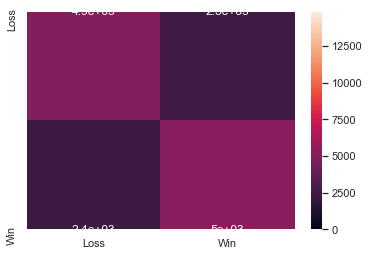

In [6]:
lr.analyze()

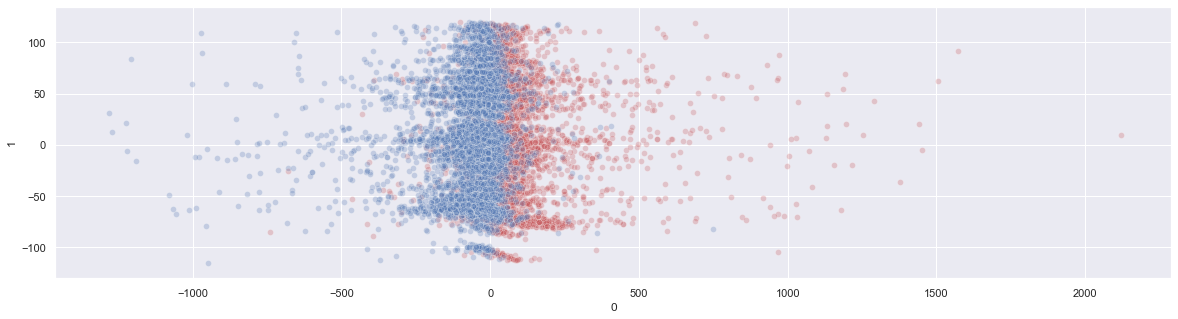

In [7]:
ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.7659201295196978

              precision    recall  f1-score   support

        Loss       0.75      0.79      0.77      7378
         Win       0.78      0.74      0.76      7446

    accuracy                           0.77     14824
   macro avg       0.77      0.77      0.77     14824
weighted avg       0.77      0.77      0.77     14824

      Loss   Win
Loss  5829  1549
Win   1921  5525


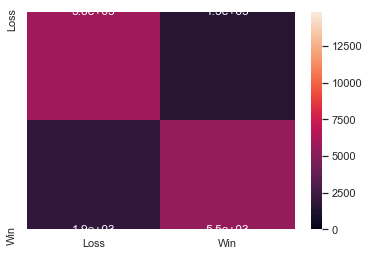

In [10]:
knn.analyze()

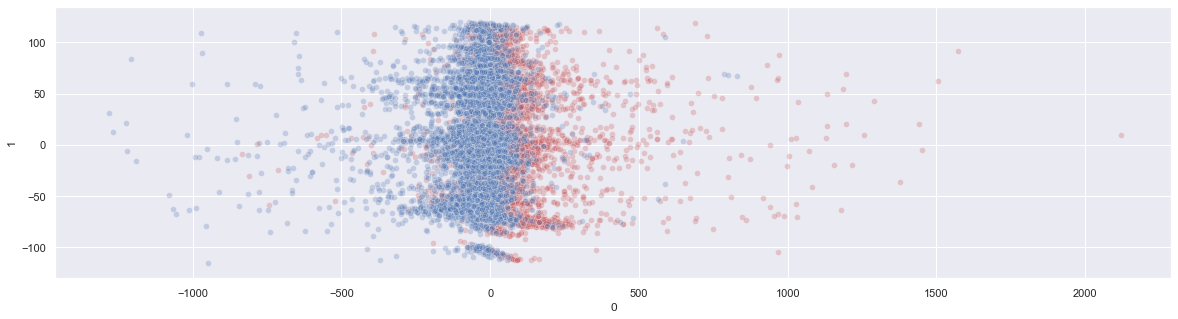

In [11]:
ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9286292498650837

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7378
         Win       0.93      0.92      0.93      7446

    accuracy                           0.93     14824
   macro avg       0.93      0.93      0.93     14824
weighted avg       0.93      0.93      0.93     14824

      Loss   Win
Loss  6883   495
Win    563  6883


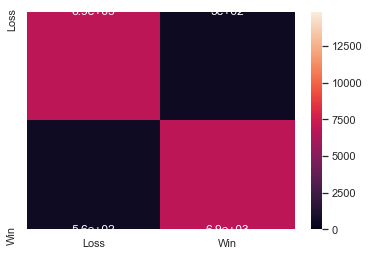

In [14]:
dt.analyze()

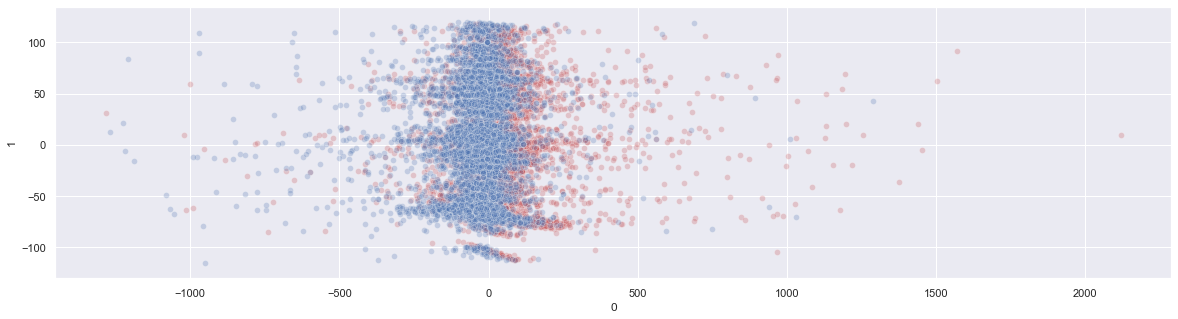

In [15]:
ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.7687533729087965

              precision    recall  f1-score   support

        Loss       0.75      0.81      0.78      7378
         Win       0.79      0.73      0.76      7446

    accuracy                           0.77     14824
   macro avg       0.77      0.77      0.77     14824
weighted avg       0.77      0.77      0.77     14824

      Loss   Win
Loss  5964  1414
Win   2014  5432


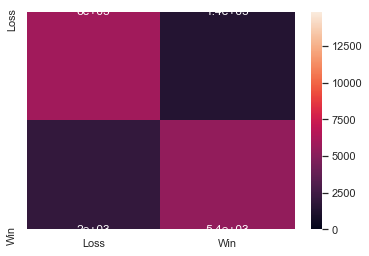

In [18]:
rf.analyze()

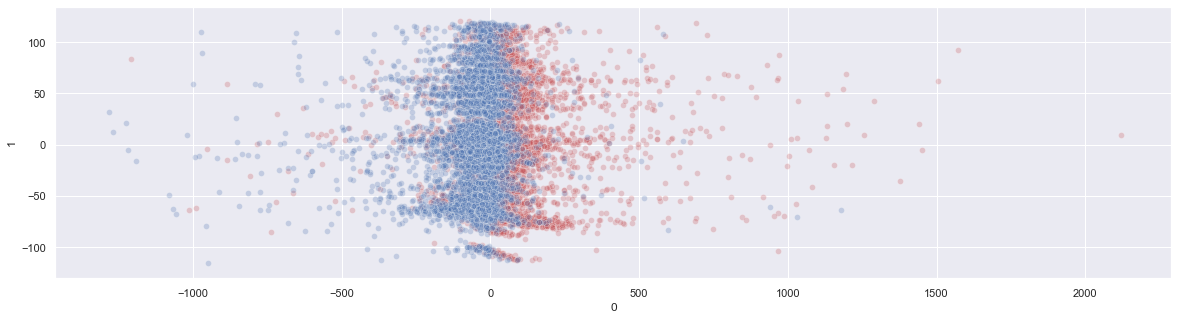

In [19]:
ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3153            8.25m
         2           1.2572            8.16m
         3           1.2087            8.00m
         4           1.1699            7.91m
         5           1.1376            7.80m
         6           1.1111            7.71m
         7           1.0795            7.64m
         8           1.0528            7.56m
         9           1.0318            7.48m
        10           1.0104            7.39m
        20           0.8858            6.55m
        30           0.8207            5.78m
        40           0.7839            4.95m
        50           0.7628            4.13m
        60           0.7434            3.30m
        70           0.7238            2.48m
        80           0.7041            1.66m
        90           0.6809           50.31s
       100           0.6612            0.00s


Model Score: 0.8580005396654075

              precision    recall  f1-score   support

        Loss       0.84      0.88      0.86      7378
         Win       0.88      0.83      0.86      7446

    accuracy                           0.86     14824
   macro avg       0.86      0.86      0.86     14824
weighted avg       0.86      0.86      0.86     14824

      Loss   Win
Loss  6508   870
Win   1235  6211


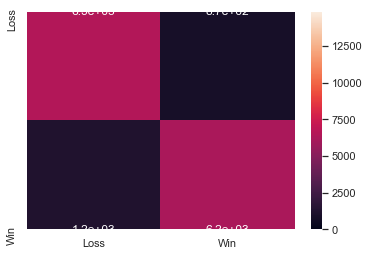

In [22]:
gb.analyze()

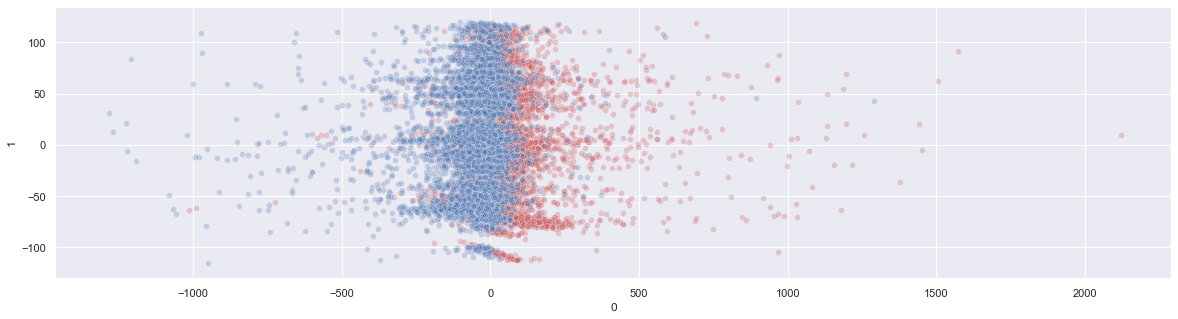

In [23]:
ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7600512682137075

              precision    recall  f1-score   support

        Loss       0.74      0.79      0.77      7378
         Win       0.78      0.73      0.75      7446

    accuracy                           0.76     14824
   macro avg       0.76      0.76      0.76     14824
weighted avg       0.76      0.76      0.76     14824

      Loss   Win
Loss  5851  1527
Win   2030  5416


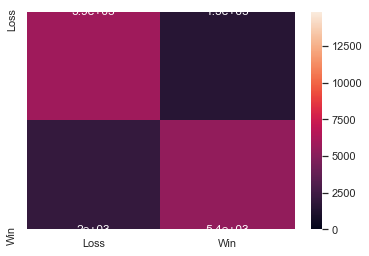

In [26]:
ab.analyze()

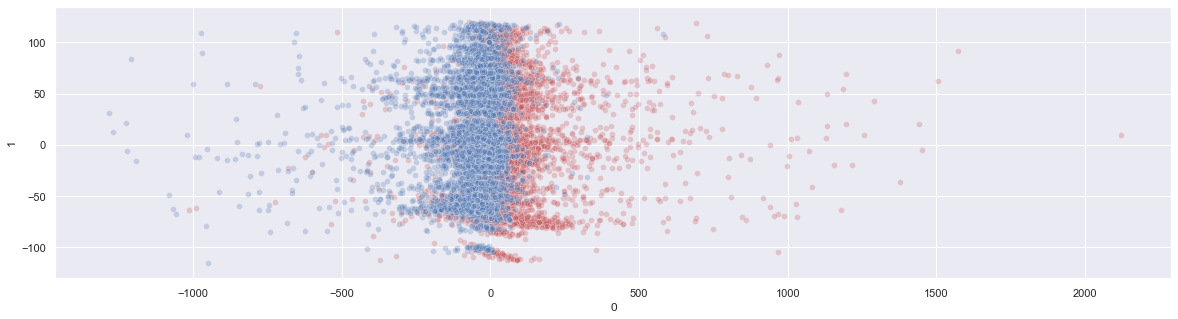

In [27]:
ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

# Results

* Decision Tress is still our best model, although adding this data decreased our performance to be about 1% (from diff+ohe_player performance)
* No change in performance for Ada Boost or Logistic regression or Gradient Boost
* Around 5% decrease in accuracy for KNN and Random Forest

In [4]:
report = pd.read_csv(ModelWrapper.report_file)
report.tail(5)

,model,description,data_file,start_year,accuracy,confusion_matrix,classification_report,model_file
49,KNeighborsClassifier,diff-ohe_player-history_percentage,../datasets/atp_matches_1985-2019_features-dif...,1998,0.789193,"{""0"": {""0"": 6049, ""1"": 1796}, ""1"": {""0"": 1329,...","{""Loss"": {""precision"": 0.7710643722115997, ""re...",../models/kneighborsclassifier-1998-2019-diff-...
50,DecisionTreeClassifier,diff-ohe_player-history_percentage,../datasets/atp_matches_1985-2019_features-dif...,1998,0.921681,"{""0"": {""0"": 6814, ""1"": 597}, ""1"": {""0"": 564, ""...","{""Loss"": {""precision"": 0.9194440696262313, ""re...",../models/decisiontreeclassifier-1998-2019-dif...
51,RandomForestClassifier,diff-ohe_player-history_percentage,../datasets/atp_matches_1985-2019_features-dif...,1998,0.772666,"{""0"": {""0"": 5969, ""1"": 1961}, ""1"": {""0"": 1409,...","{""Loss"": {""precision"": 0.7527112232030265, ""re...",../models/randomforestclassifier-1998-2019-dif...
52,GradientBoostingClassifier,diff-ohe_player-history_percentage,../datasets/atp_matches_1985-2019_features-dif...,1998,0.859822,"{""0"": {""0"": 6475, ""1"": 1175}, ""1"": {""0"": 903, ...","{""Loss"": {""precision"": 0.8464052287581699, ""re...",../models/gradientboostingclassifier-1998-2019...
53,AdaBoostClassifier,diff-ohe_player-history_percentage,../datasets/atp_matches_1985-2019_features-dif...,1998,0.757420,"{""0"": {""0"": 5805, ""1"": 2023}, ""1"": {""0"": 1573,...","{""Loss"": {""precision"": 0.7415687276443536, ""re...",../models/adaboostclassifier-1998-2019-diff-oh...


### How to interpret feature labels

I tried a number of features and ran them through the same model.

The keys for dataset are named in this way {feature set 1}-{feature set 2}-...

Here is a table of keys to explain each dataset:

| Feature Set Label | Description |
|-----|-------------|
| diff | player stats are diffed. This is always p1 - p2 - ie, height difference |
| ohe_player | player ID's are replaced with one hot encoding |
| ohe | all non-ordinal categorical data is one hot encoded - ie, tournament ID, surface, player origin, etc |
| history | record of last 5 matches for a player leading up to the match - ie, total matches won/lost, games won/lost, win percentage etc |
| matchup | record of last 5 matches for a player leading up to the match - ie, total matches won |
| history_percentage | record of last 5 matches for a player leading up to the match. Only percentage columns are kept - ie, win percentage, games won percentage, etc |
| matchup_percentage | record of last 5 matchups between player 1 and 2 leading up to the match. Only percentage columns are kept - ie, win percentage, loss percentage, etc |

Text(0.5, 1.0, 'Model Accuracy')

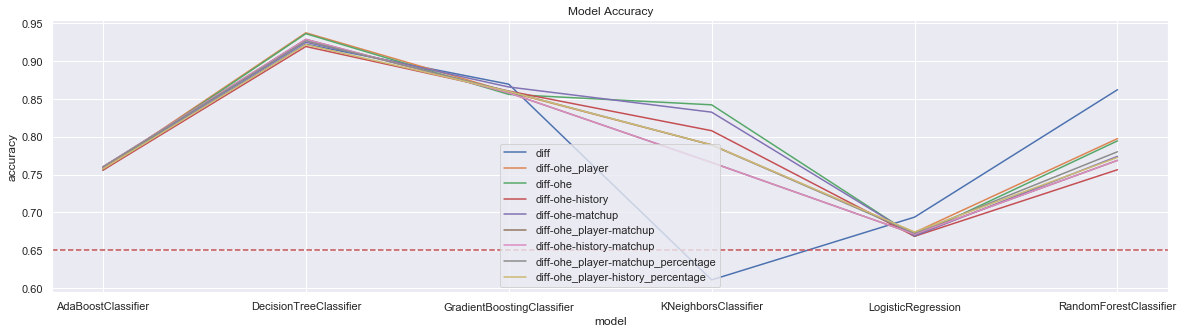

In [5]:
f, a = plt.subplots(1, 1, figsize=(20, 5))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    sns.lineplot(x="model", y="accuracy", data=report_desc, label=desc)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")

## Decision Tree did the best so let's take a closer look at Decision Tree Accuracy for our Different Datasets

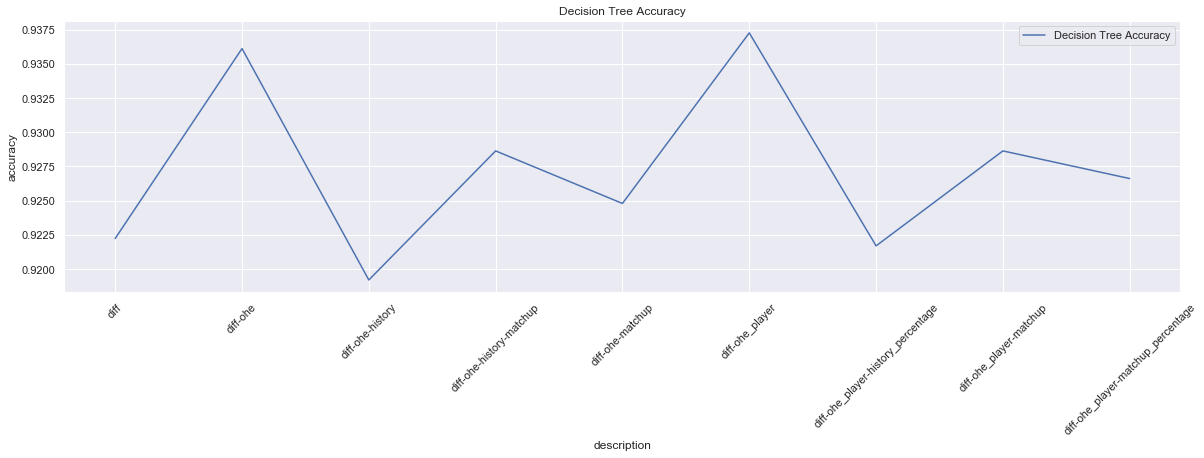

In [8]:
dt_report = report[report.model == 'DecisionTreeClassifier'].sort_values("accuracy")
f, a = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x="description", y="accuracy", data=dt_report, label="Decision Tree Accuracy")
_ = a.set_title("Decision Tree Accuracy")
_ = plt.xticks(rotation=45)
